# 손동작 분류 경진대회

## 패키지 import 및 데이터 전처리

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [8]:
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('C:/Users/Jaesu/Dacon-Basic/손동작-분류/Data/train.csv')

`-` 32개의 센서 데이터이다

In [9]:
df.head()

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,1,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,25.017645,-4.061254,0.996632,-3.837345,-13.956994,-2.042957,2.130210,-1.957662,-1.149930,6.082028,0.878612,5.093102,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,2,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,2.952843,-5.046353,1.083819,3.978378,-25.072542,-2.041602,2.912269,-3.998035,6.069698,4.966187,1.994051,-1.132059,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,3,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,-23.218408,-9.000630,9.115957,12.097318,-10.954367,-3.930714,-19.069594,-6.118940,-5.001346,-9.105371,-9.894885,10.107614,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,4,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,-15.123774,-0.069867,-0.114247,-1.896109,5.127194,-2.877423,2.970044,-1.099702,3.116767,8.124209,-0.917418,-1.027199,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,5,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,16.010442,5.961219,9.907115,-0.067754,-9.970728,0.868499,1.892233,-3.161698,-9.225990,3.953956,-17.959652,-3.115491,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [6]:
df.isnull().values.any() ## 결측치는 없다

False

In [10]:
df.describe() ## 요약통계량 확인

,id,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,1168.000000,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,-1.099322,-0.843473,-0.491915,-0.851473,-0.344029,-1.128676,-0.959658,-0.639778,-0.559455,-0.658692,-0.611461,-0.741168,0.027448,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,674.200761,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,26.262009,15.498328,11.894939,7.401702,25.815937,15.513633,11.654236,7.586333,26.885734,15.936823,11.942224,7.548507,26.671928,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,1.000000,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,-115.943693,-102.916207,-115.053373,-59.689434,-107.985386,-126.950747,-95.956853,-83.854213,-108.964270,-108.094304,-103.876936,-59.993001,-93.171275,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,584.500000,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,-15.165419,-8.082508,-3.893967,-3.982224,-14.953749,-8.096568,-4.038010,-3.996916,-15.179515,-7.851749,-4.002134,-3.973502,-14.102903,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,1168.000000,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,-1.116522,-1.054003,-0.908079,-0.937905,-0.858820,-1.004242,-0.947597,-0.967231,-0.964579,-1.013369,-0.942706,-0.968065,-1.104314,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,1751.500000,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,13.022905,6.021600,2.992981,2.854699,12.965905,5.508252,2.895085,2.876743,13.978336,5.917309,2.948692,2.920789,12.137937,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,2335.000000,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,127.110419,99.932331,107.910041,40.026878,126.981907,120.974880,85.952050,39.993408,117.934200,121.026042,102.882569,40.917741,121.959404,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


`-` 모두 수치형으로 되어있다

In [18]:
df.drop('id', axis=1, inplace=True) ## id는 피쳐가 아니므로 드랍

## 데이터 EDA

### feature 분포

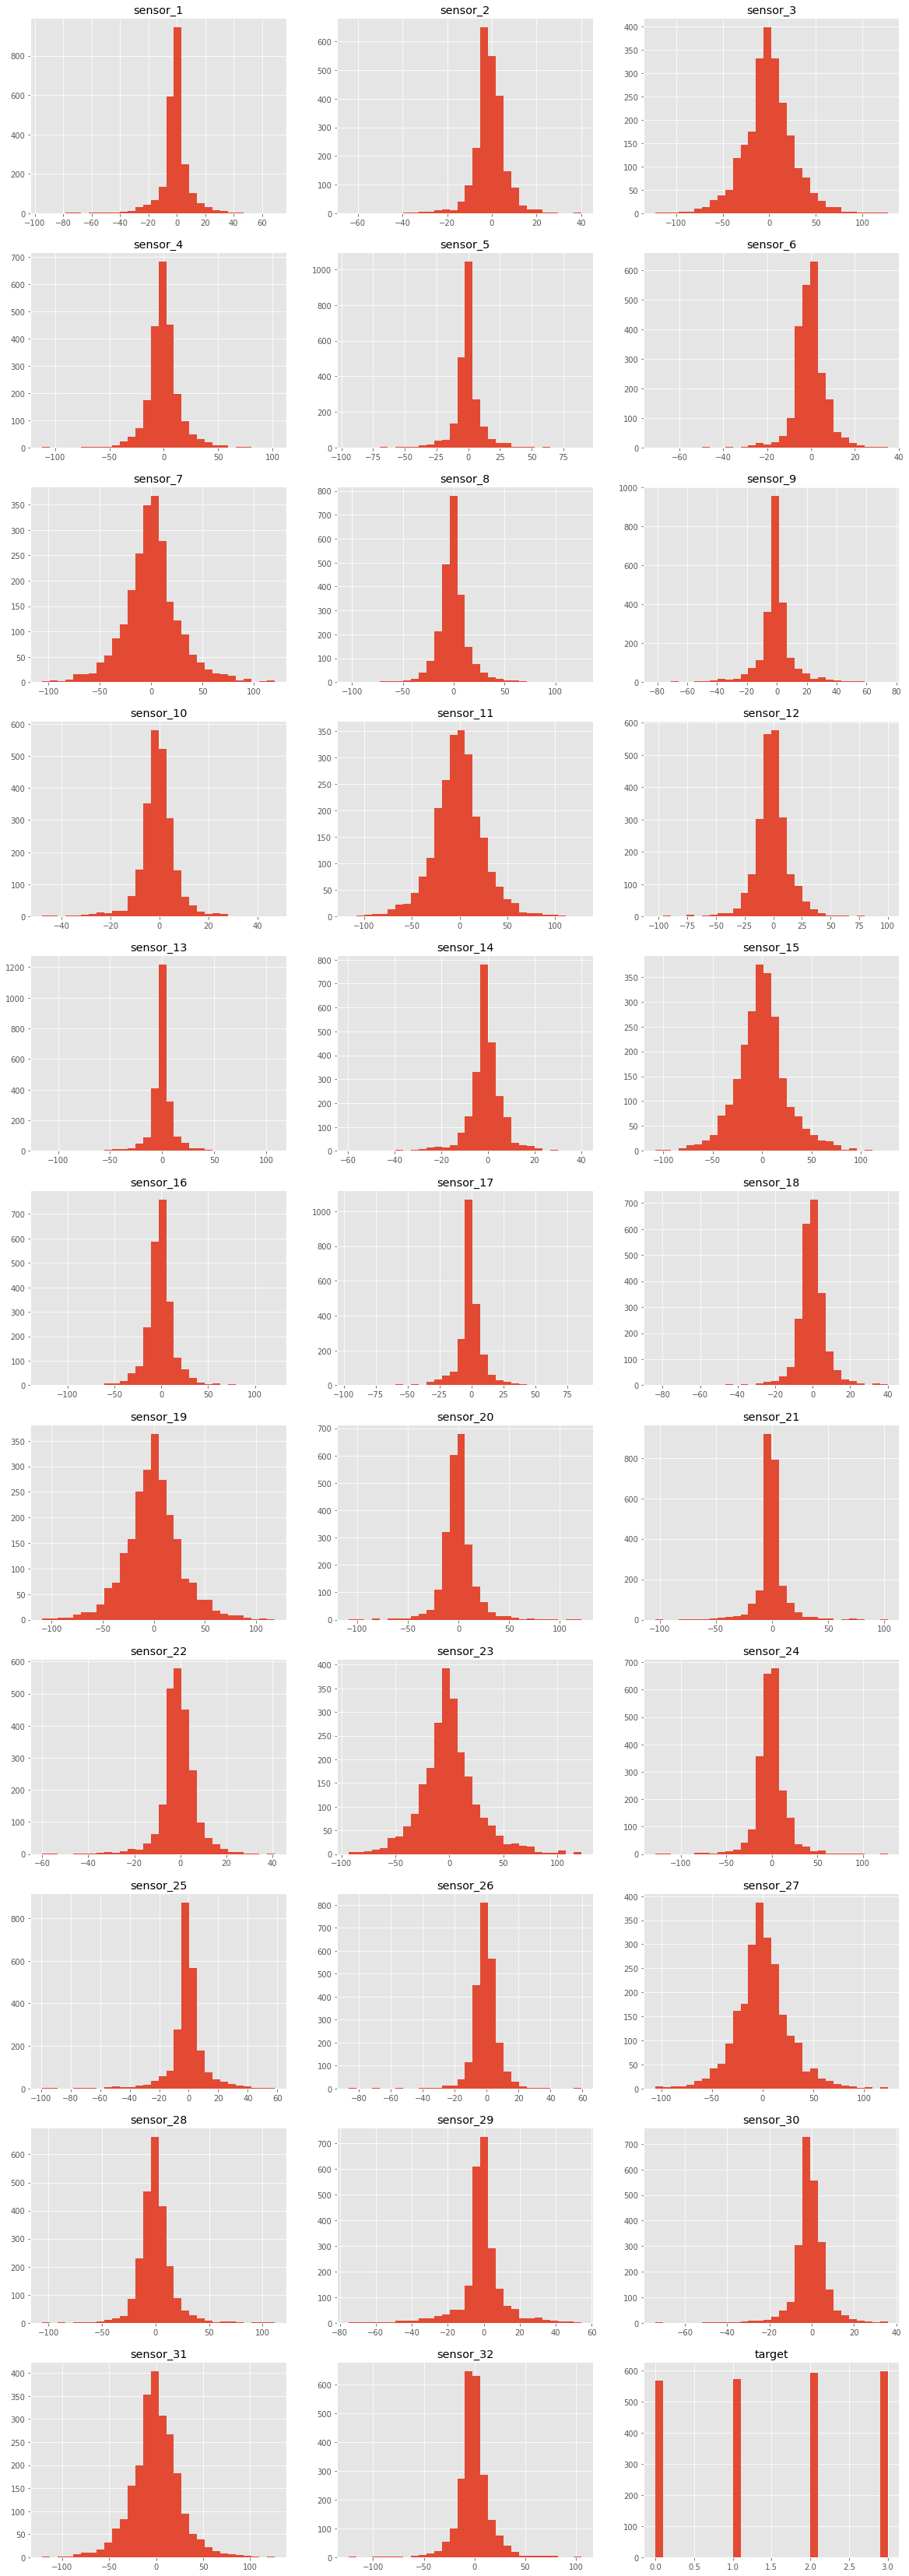

In [47]:
feature = df.columns
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.hist(df[feature[i]], bins = 30)
plt.show()

`-` 센서데이터 피쳐는 종모양을 띄며 target의 라벨 범주가 가지는 빈도수는 서로 비슷하다

### 상관관계 시각화

In [39]:
corr_matrix = df.corr(method='pearson') # 상관관계 행렬
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

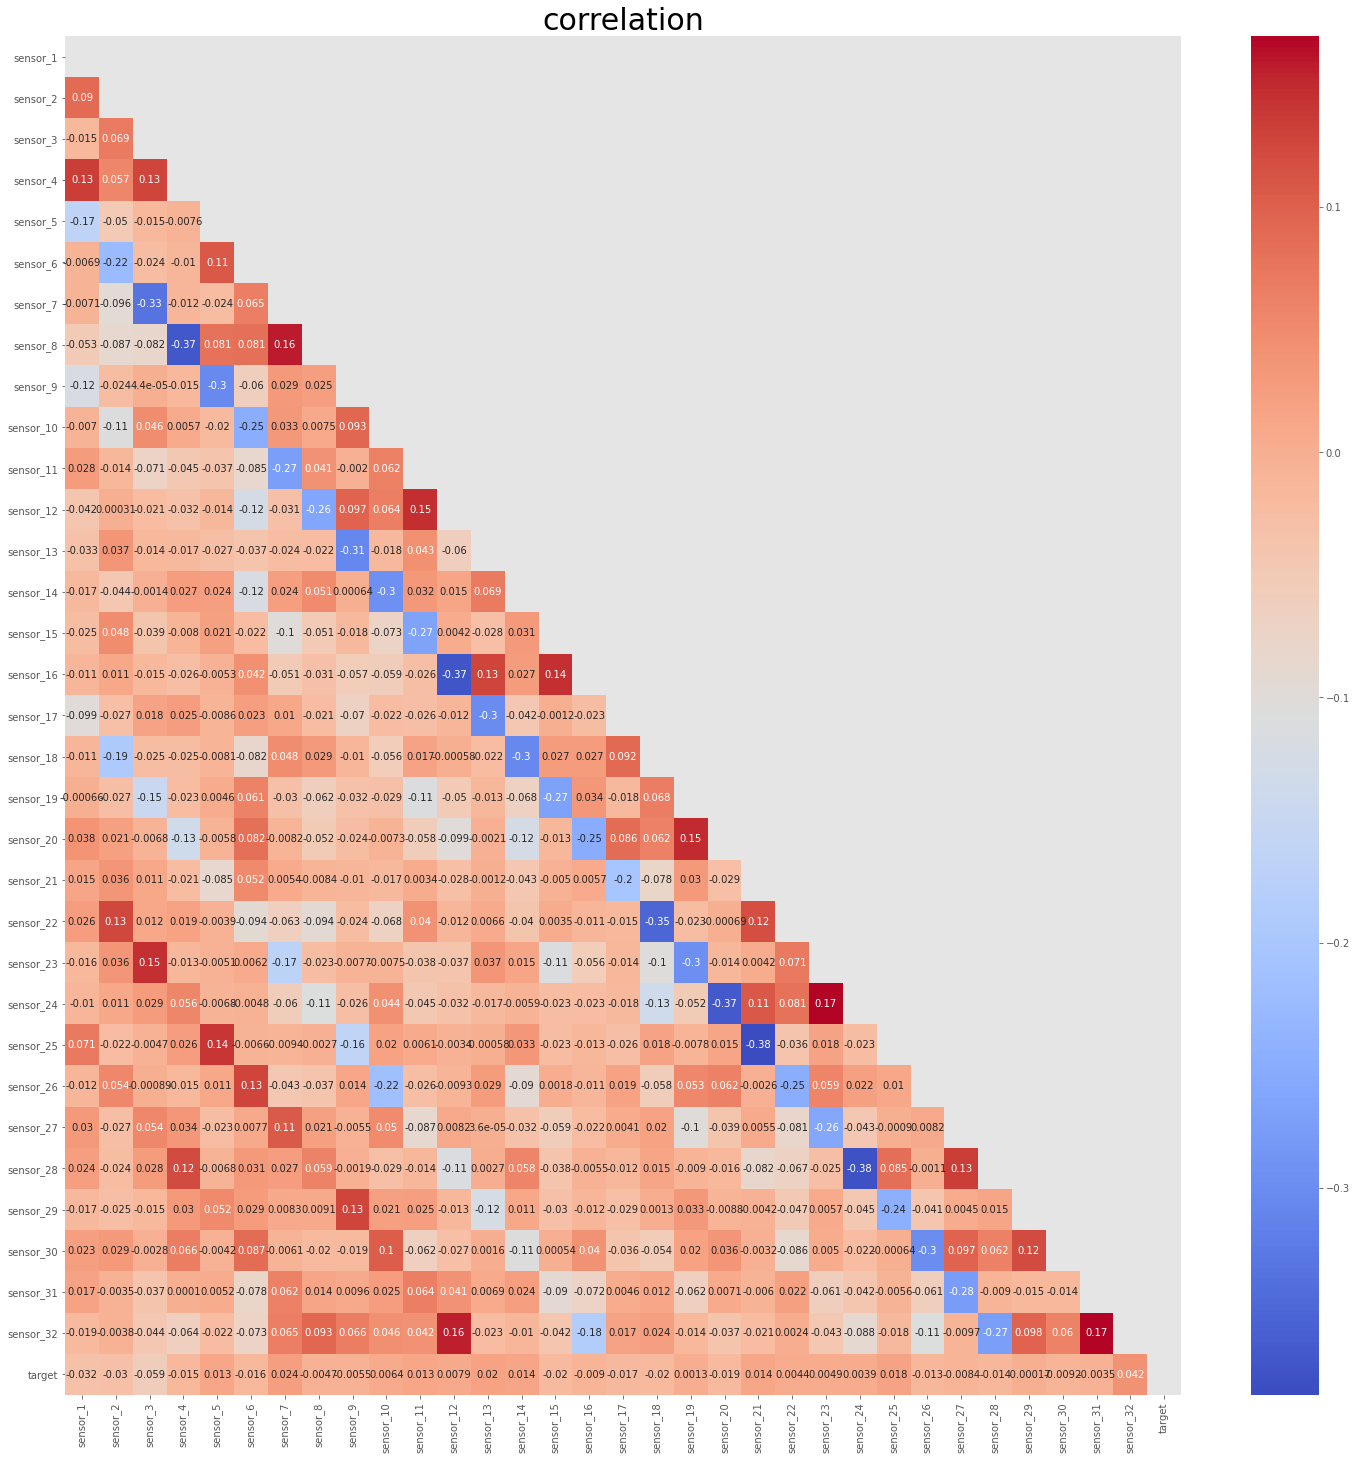

In [41]:
plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='coolwarm')
plt.title('correlation', fontsize=30)
plt.show()